# World Happness Analysis

* 데이터 출처 : Kaggle

* 행복지수와 다른 feature들 간의 관계 분석
* 한국은 주요 feature들이 전 세계에서 몇 위 인지 파악

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df2020 = pd.read_csv('./data/2020.csv', index_col=0)
df2021 = pd.read_csv('./data/2021.csv', index_col=0)

df2020.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.8087,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,2.762835
2,Denmark,7.6456,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,2.432741
3,Switzerland,7.5599,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,2.350267
4,Iceland,7.5045,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,2.460688
5,Norway,7.4880,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,2.168266


In [8]:
df2021.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.7,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.4,0.919,0.025,2.839
4,Iceland,7.554,7.670,7.438,10.878,0.983,73.0,0.955,0.160,2.967
5,Netherlands,7.464,7.518,7.410,10.932,0.942,72.4,0.913,0.175,2.798


In [10]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Happiness score               153 non-null    float64
 2   upperwhisker                  153 non-null    float64
 3   lowerwhisker                  153 non-null    float64
 4   GDP per capita                153 non-null    float64
 5   Social support                153 non-null    float64
 6   Healthy life expectancy       153 non-null    float64
 7   Freedom to make life choices  153 non-null    float64
 8   Generosity                    153 non-null    float64
 9   Dystopia                      153 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


In [12]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 1 to 149
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Happiness score               149 non-null    float64
 2   upperwhisker                  149 non-null    float64
 3   lowerwhisker                  149 non-null    float64
 4   GDP per capita                149 non-null    float64
 5   Social support                149 non-null    float64
 6   Healthy life expectancy       149 non-null    float64
 7   Freedom to make life choices  149 non-null    float64
 8   Generosity                    149 non-null    float64
 9   Dystopia                      149 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.8+ KB


In [14]:
df2020.shape, df2021.shape

((153, 10), (149, 10))

In [16]:
df2020.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis=1, inplace=True)
df2021.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis=1, inplace=True)

## 행복지수와 기능의 상관관계

* 컬럼 단순화 

In [58]:
df2020.columns = ['Country', 'score', 'GDP.per.capita', 'Social.support', 'life.expectancy', 'Freedom', 'Generosity']
df2021.columns = ['Country', 'score', 'GDP.per.capita', 'Social.support', 'life.expectancy', 'Freedom', 'Generosity']

In [60]:
df2020.head()

,Country,score,GDP.per.capita,Social.support,life.expectancy,Freedom,Generosity
Rank,,,,,,,
1,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
2,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
3,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
4,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
5,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533


In [62]:
df1 = df2020[['Country', 'score', 'GDP.per.capita', 'Freedom']]
df1.head()

,Country,score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.8087,10.639267,0.949172
2,Denmark,7.6456,10.774001,0.951444
3,Switzerland,7.5599,10.979933,0.921337
4,Iceland,7.5045,10.772559,0.948892
5,Norway,7.4880,11.087804,0.955750


In [64]:
df1[['score', 'GDP.per.capita', 'Freedom']].corr()

,score,GDP.per.capita,Freedom
score,1.000000,0.775374,0.590597
GDP.per.capita,0.775374,1.000000,0.419019
Freedom,0.590597,0.419019,1.000000


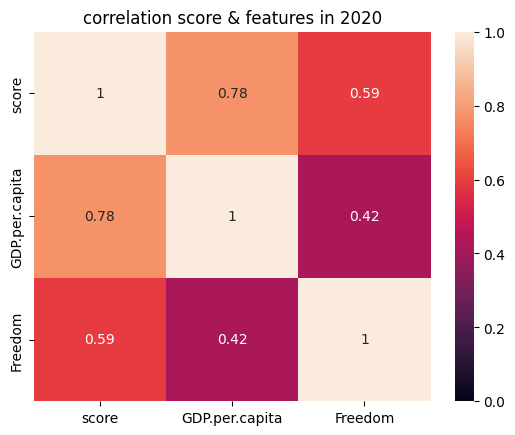

In [66]:
sns.heatmap(df1[['score', 'GDP.per.capita', 'Freedom']].corr(), annot=True, vmin=0, vmax=1.0)
plt.title('correlation score & features in 2020')
plt.show()

In [69]:
df2 = df2021[['Country', 'score', 'GDP.per.capita', 'Freedom']]
df2.head()

,Country,score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.842,10.775,0.949
2,Denmark,7.620,10.933,0.946
3,Switzerland,7.571,11.117,0.919
4,Iceland,7.554,10.878,0.955
5,Netherlands,7.464,10.932,0.913


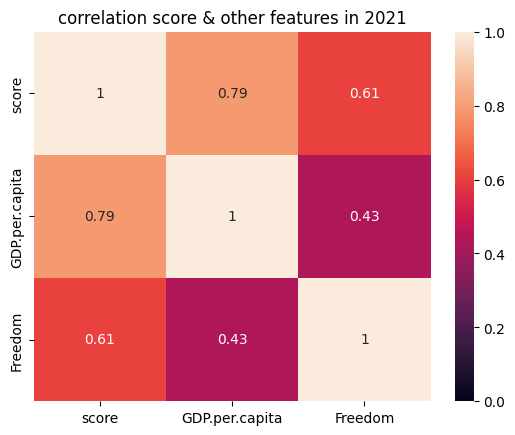

In [71]:
sns.heatmap(df2.select_dtypes(include=[np.number]).corr(), annot=True, vmin=0, vmax=1)
plt.title("correlation score & other features in 2021")
plt.show()

* 행복지수와 GDP 및 자유도와의 상관관계는 양의 상관관계이다

## 행복지수와 국가의 사회적 상태

In [74]:
x1 = df2020[['Generosity', 'Social.support', 'score']].copy()
x2 = df2021[['Generosity', 'Social.support', 'score']].copy()

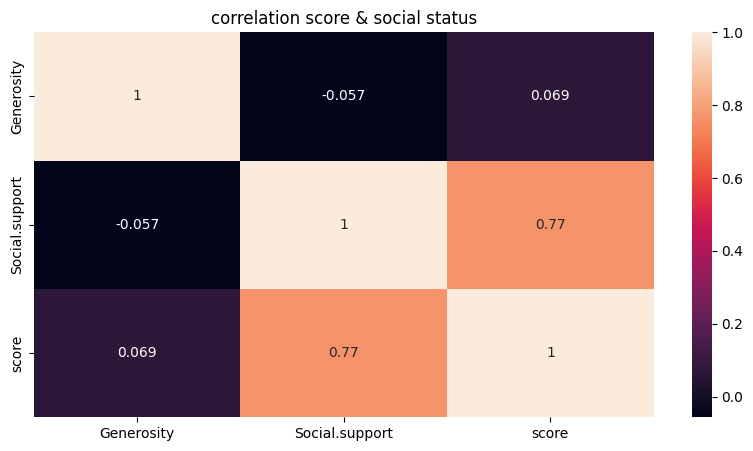

In [76]:
a1 = x1.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(a1, annot=True)
plt.title("correlation score & social status")
plt.show()

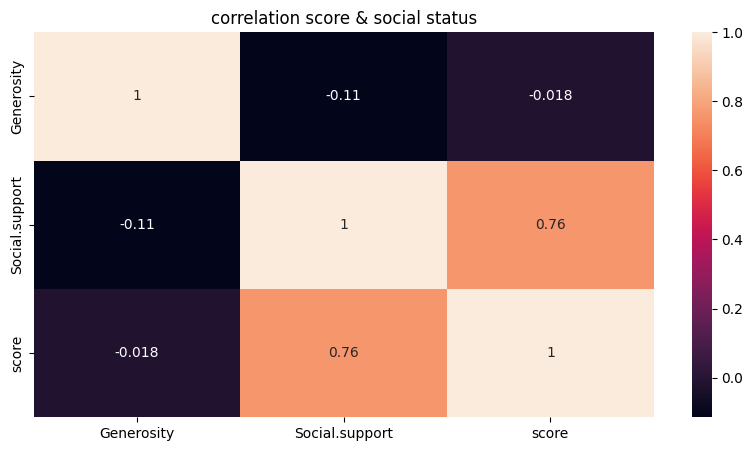

In [78]:
a2 = x2.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(a2, annot=True)
plt.title("correlation score & social status")
plt.show()

* 행복지수와 사회적 지지는 양의 상관관계가 있으며, 기부는 상관관계가 미미한 것으로 확인이 되었다

In [81]:
corr = df2020.select_dtypes([np.number]).corr()
corr

,score,GDP.per.capita,Social.support,life.expectancy,Freedom,Generosity
score,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043
GDP.per.capita,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399
Social.support,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780
life.expectancy,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852
Freedom,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721
Generosity,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000


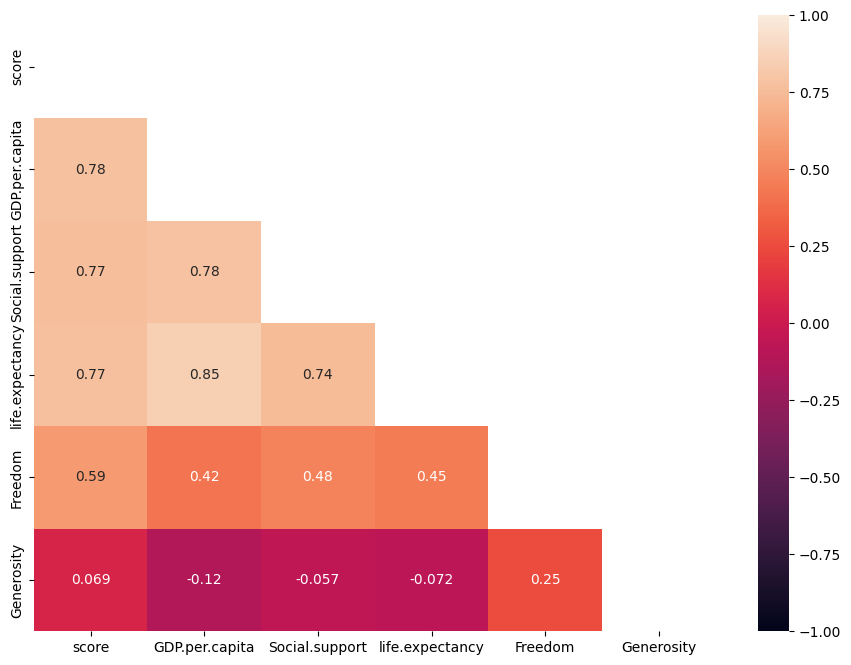

In [83]:
plt.figure(figsize=(11, 8))
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, vmin=-1, vmax = 1, annot=True)
plt.show()

In [85]:
corr = df2021.select_dtypes([np.number]).corr()
corr

,score,GDP.per.capita,Social.support,life.expectancy,Freedom,Generosity
score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799
GDP.per.capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286
Social.support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946
life.expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750
Freedom,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000


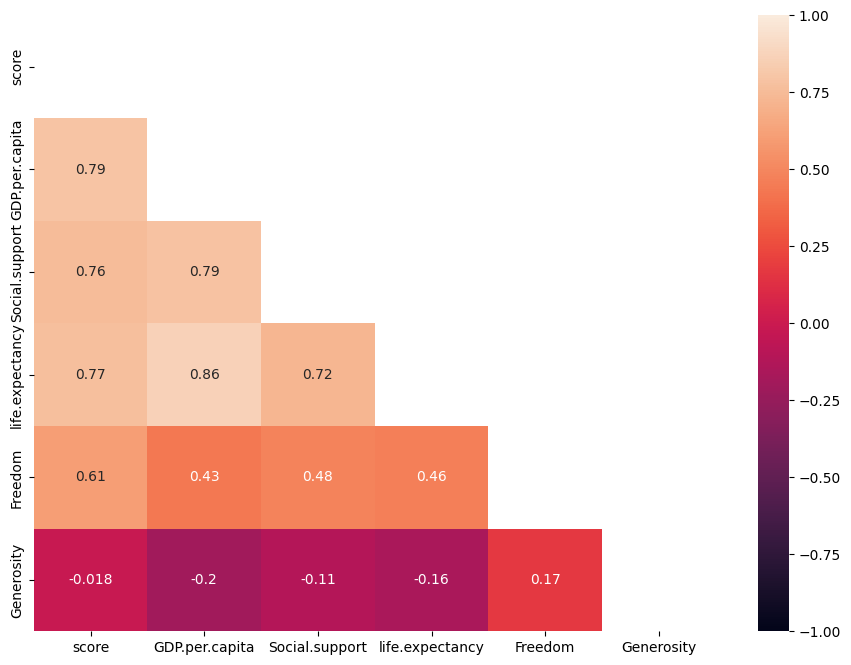

In [87]:
plt.figure(figsize=(11, 8))
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, vmin=-1, vmax = 1, annot=True)
plt.show()

* 행복지수에 가장 영향을 주는 것은 경제적 여유, 사회적지지, 기대수명, 자유도 순으로 파악된다

## 한국의 현재 순위는?

In [110]:
economy = df2020.loc[:,['Country', 'GDP.per.capita']]
economy = economy.groupby(economy.Country)["GDP.per.capita"].mean().sort_values(ascending=False)
economy = economy.rank(method='min', ascending=False)['South Korea']
social = df2020.loc[:,["Country","Social.support"]]
social = social.groupby(social.Country)['Social.support'].mean().sort_values(ascending=False)
social = social.rank(method='min', ascending=False)['South Korea']
health = df2020.loc[:,["Country",'life.expectancy']]
health = health.groupby(health.Country)["life.expectancy"].mean().sort_values(ascending=False)
health = health.rank(method='min', ascending=False)['South Korea']
free = df2020.loc[:, ["Country", "Freedom"]]
free = free.groupby(free.Country)['Freedom'].mean().sort_values(ascending=False)
free = free.rank(method = 'min', ascending=False)["South Korea"]

print(f"153개국 중 대한민국의 GDP 순위 {int(economy)}위, 사회적 지위 순위 {int(social)}위, 기대수명 순위 {int(health)}위, 자유도 순위 {int(free)}위")

153개국 중 대한민국의 GDP 순위 27위, 사회적 지위 순위 99위, 기대수명 순위 10위, 자유도 순위 140위


# 기대수명과 GDP 간의 관계

* 기대수명과 GDP 간은 양의 상관관계를 가지고 있음을 파악할 수 있다 

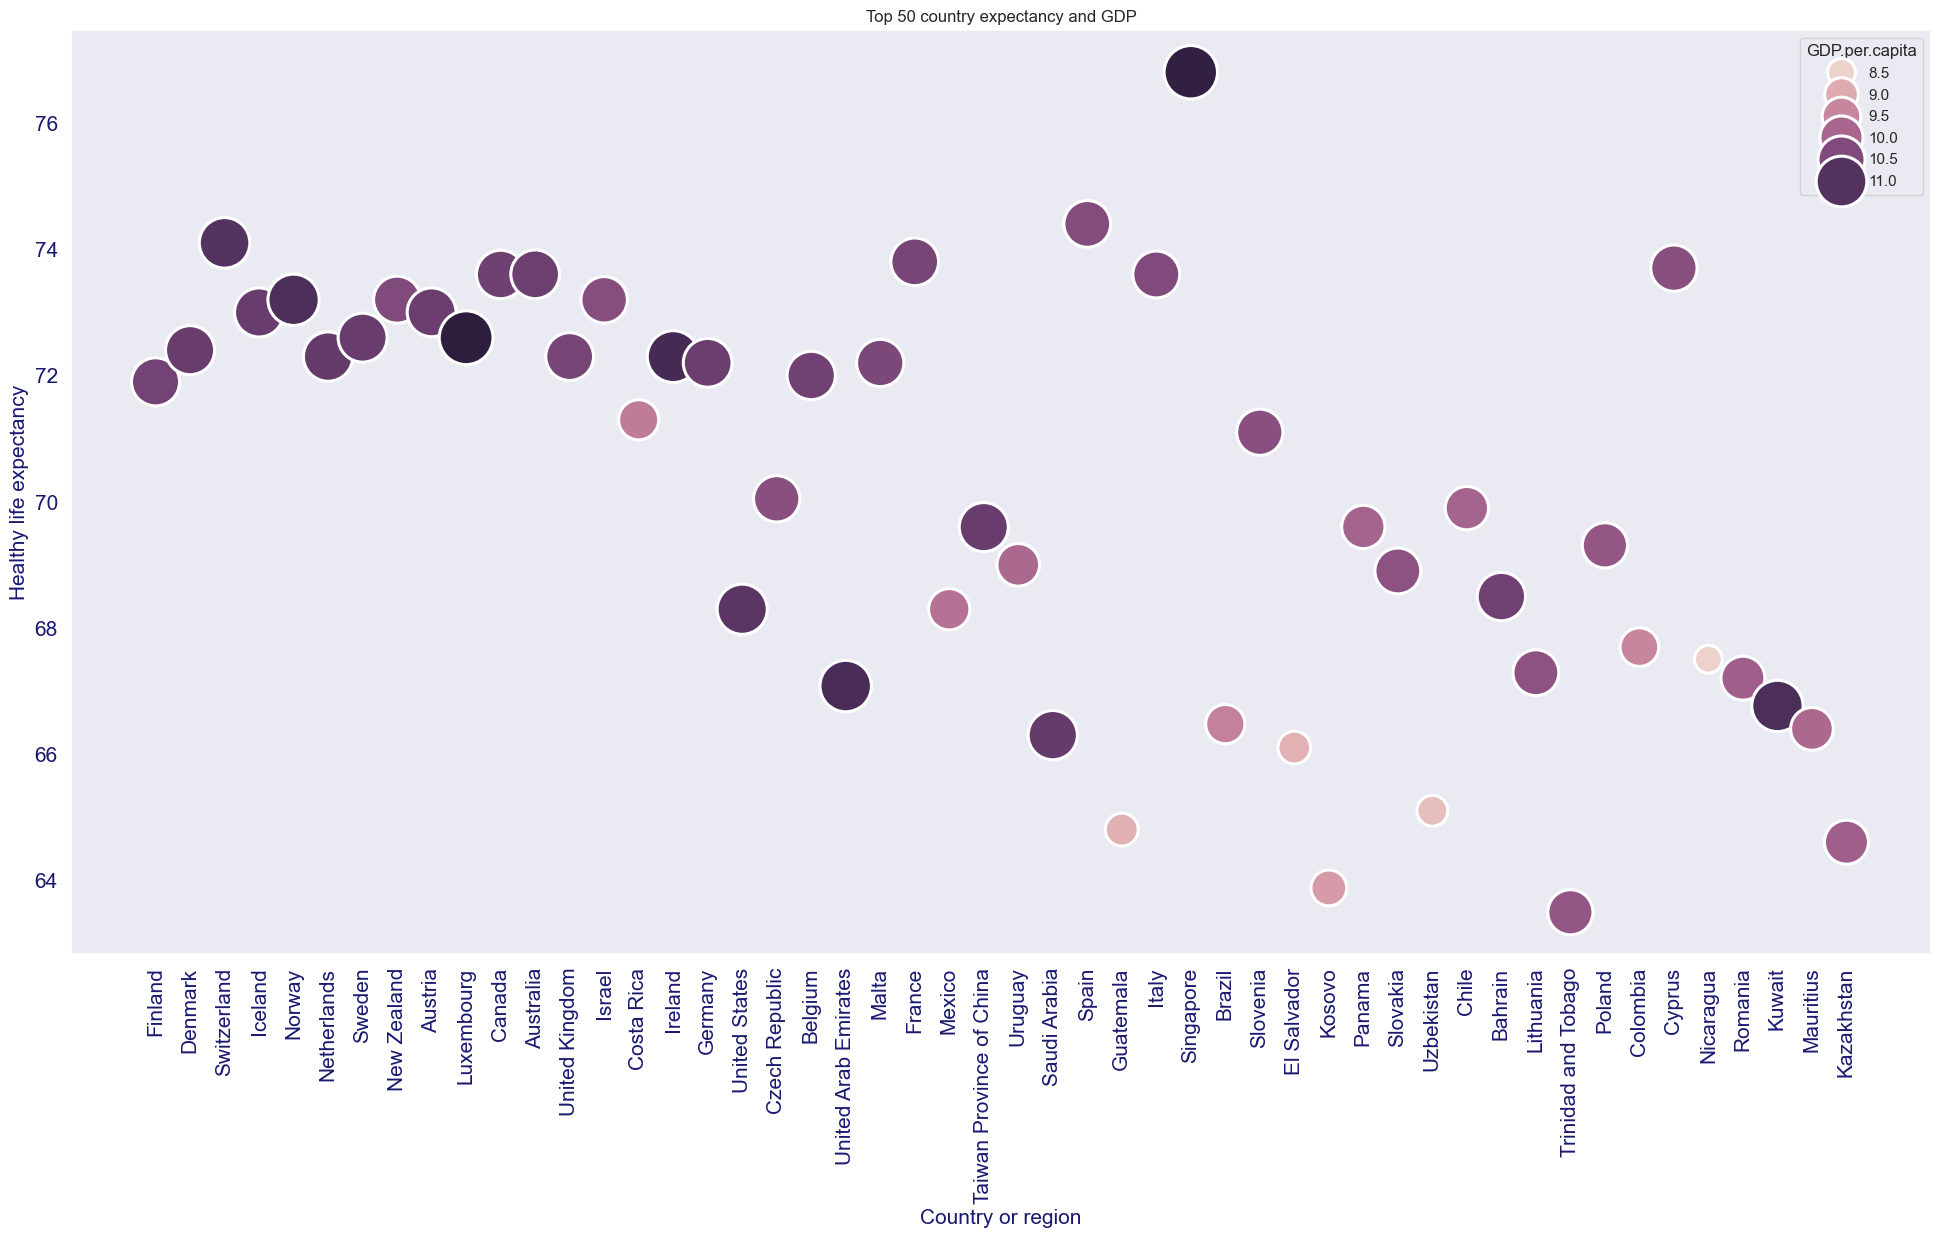

In [124]:
top50 = df2020.head(50)
sns.set_theme(style="dark")
plt.figure(figsize=(24, 12))
ax = sns.scatterplot(data=top50, x="Country", y='life.expectancy', size='GDP.per.capita', sizes=(400, 1500), hue='GDP.per.capita')
plt.xticks(rotation = 90, fontsize=15, color = 'midnightblue')
plt.yticks(fontsize=15, color = 'midnightblue')
plt.xlabel("Country or region", size=15, color = "midnightblue")
plt.ylabel("Healthy life expectancy", size=15, color = 'midnightblue')
plt.title('Top 50 country expectancy and GDP')
plt.show()

<Figure size 1000x600 with 0 Axes>

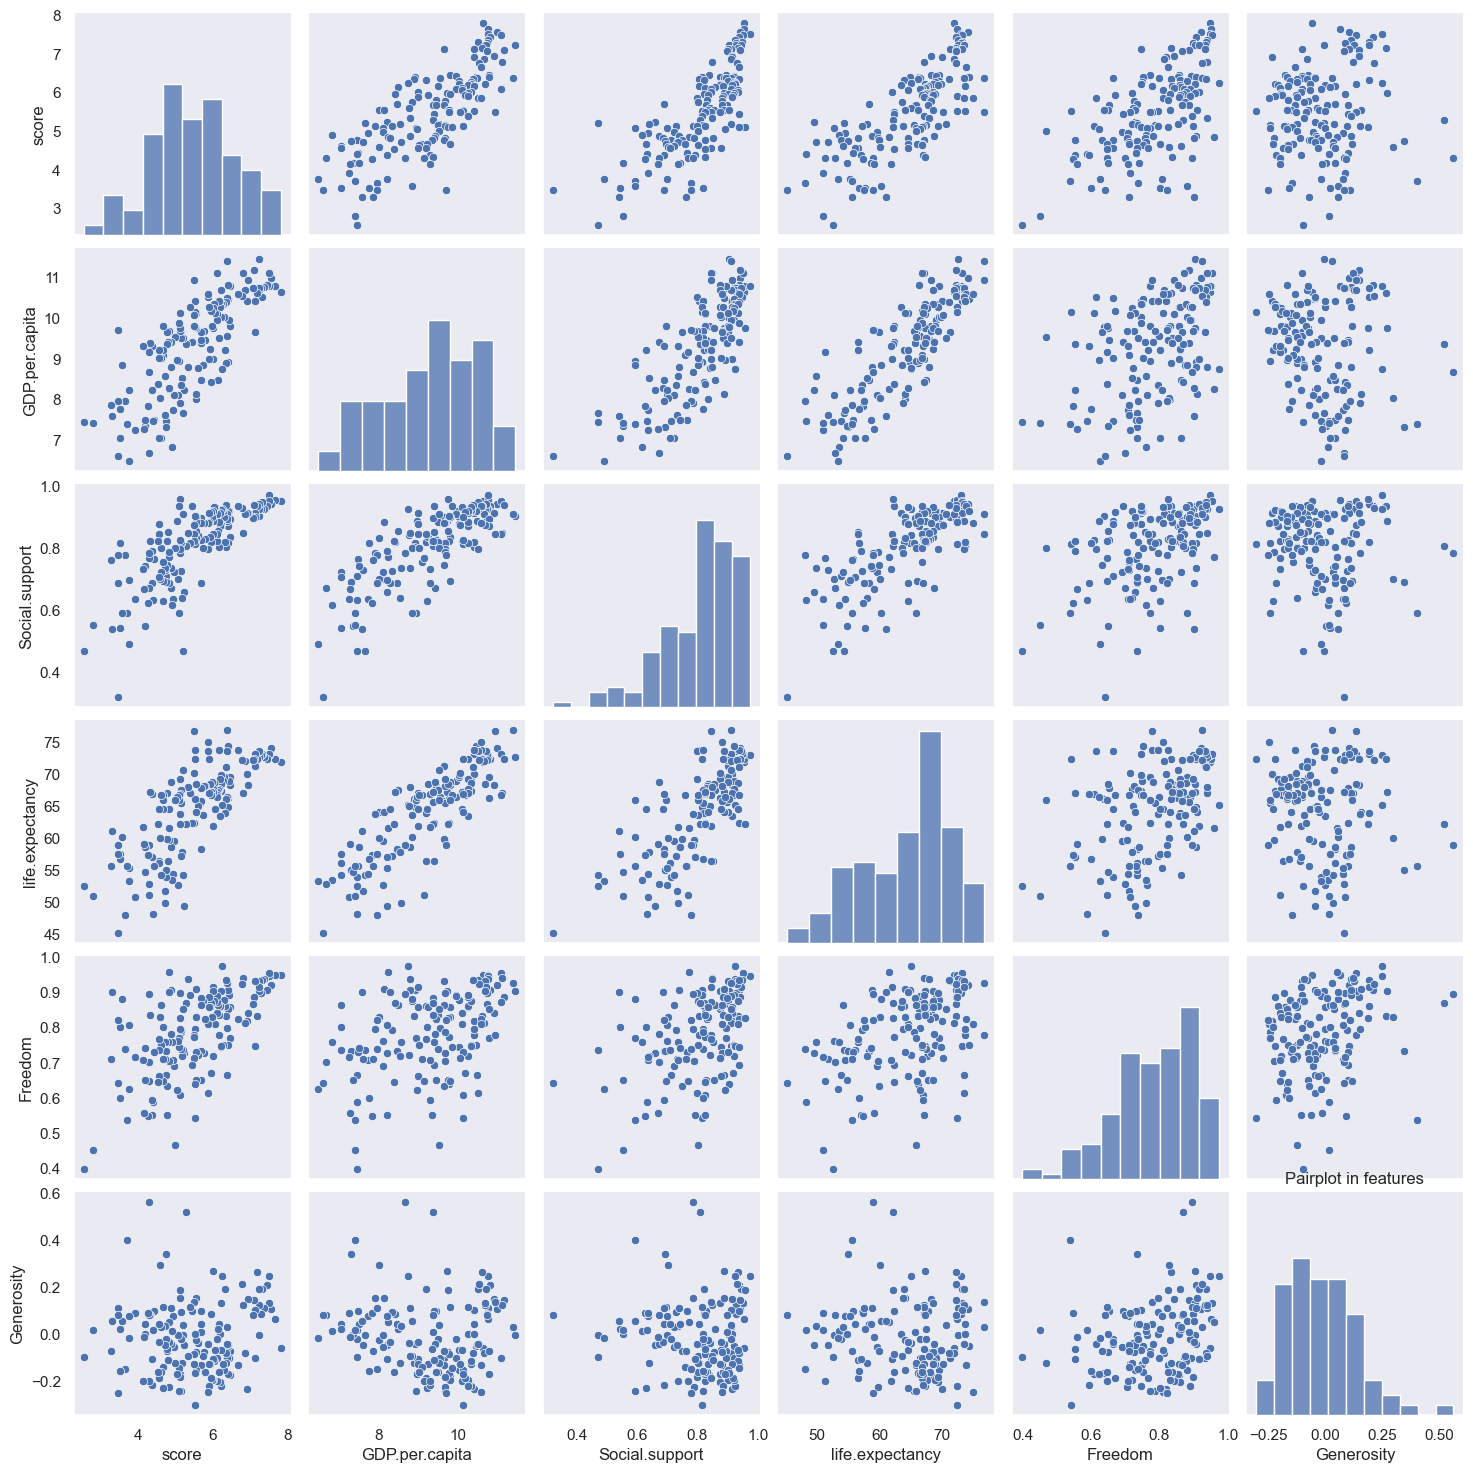

In [128]:
plt.figure(figsize=(10, 6))
sns.pairplot(df2020.select_dtypes([np.number]))
plt.title("Pairplot in features")
plt.show()

* 다양한 관계의 feature에서 선형관계가 있음을 알 수 있다.